# Confusion Matrix: Theory

A **confusion matrix** is a table used to evaluate the performance of a classification algorithm. It compares the predicted labels from a model to the actual labels in the data, providing a summary of prediction results for each class.

## Structure

For binary classification, the confusion matrix is a 2x2 table:

- **True Positives (TP):** Correctly predicted positive cases
- **True Negatives (TN):** Correctly predicted negative cases
- **False Positives (FP):** Incorrectly predicted positive cases (Type I error)
- **False Negatives (FN):** Incorrectly predicted negative cases (Type II error)

|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| Actual Positive | TP                 | FN                 |
| Actual Negative | FP                 | TN                 |

## Metrics Derived from Confusion Matrix

- **Accuracy:** (TP + TN) / (TP + TN + FP + FN)
- **Precision:** TP / (TP + FP)
- **Recall (Sensitivity):** TP / (TP + FN)
- **F1 Score:** Harmonic mean of precision and recall
- **Specificity:** TN / (TN + FP)

## Importance

- Helps understand not just overall accuracy, but also the types of errors made by a classifier
- Useful for imbalanced datasets where accuracy alone can be misleading
- Basis for many other evaluation metrics in machine learning

## Example

If a model predicts whether emails are spam or not, the confusion matrix shows how many spam emails were correctly identified, how many non-spam emails were incorrectly marked as spam, and so on.

In [20]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [4]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(digits.data,digits.target,test_size=0.2)

In [7]:
len(X_Test)

360

In [8]:
len(X_Train)

1437

In [10]:
model=LogisticRegression()

In [11]:
model.fit(X_Train,Y_Train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<Figure size 640x480 with 0 Axes>

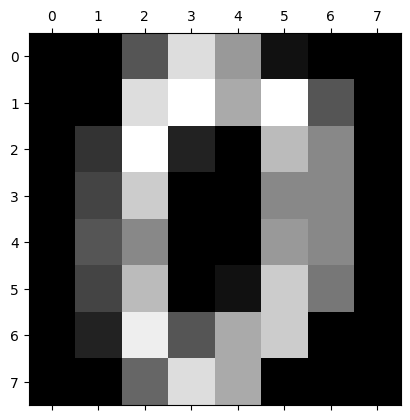

In [14]:
plt.gray()
plt.matshow(digits.images[0])

In [15]:
model.predict([digits.data[0]])

array([0])

In [18]:
Y_Predicted=model.predict(X_Test)
cm=confusion_matrix(Y_Test,Y_Predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 26,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 36,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  5,  0,  1,  0,  0,  0,  0, 21,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 41]])

Text(95.72222222222221, 0.5, 'Truth')

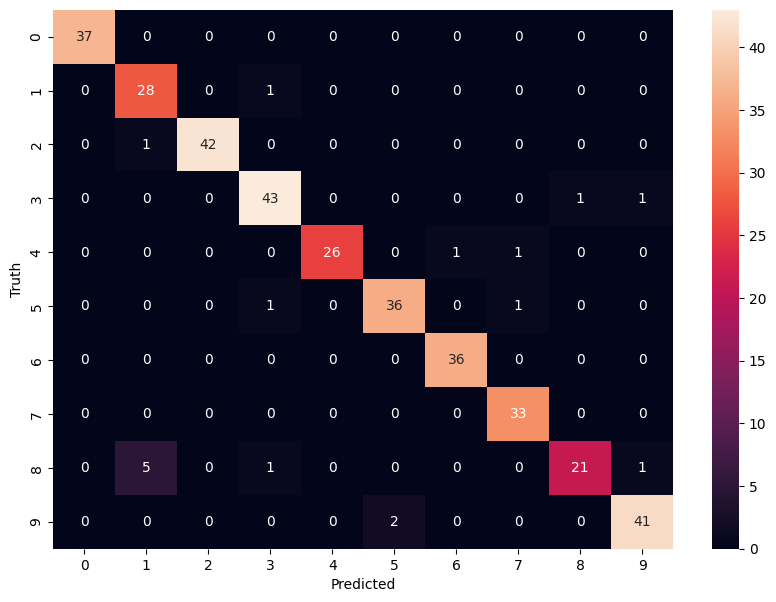

In [21]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Confusion Matrix Analysis

## What is a Confusion Matrix?

A confusion matrix shows how well a classifier performs by comparing **predicted labels** vs **actual labels**. Each row represents the **actual class**, and each column represents the **predicted class**. Diagonal values are correct predictions; off-diagonal values are mistakes.

---

## Our Matrix (10-Class Classifier, likely digits 0–9)

|       | P: 0 | P: 1 | P: 2 | P: 3 | P: 4 | P: 5 | P: 6 | P: 7 | P: 8 | P: 9 |
|-------|------|------|------|------|------|------|------|------|------|------|
| **A: 0** | **37** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| **A: 1** | 0 | **28** | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |
| **A: 2** | 0 | 1 | **42** | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| **A: 3** | 0 | 0 | 0 | **43** | 0 | 0 | 0 | 0 | 1 | 1 |
| **A: 4** | 0 | 0 | 0 | 0 | **26** | 0 | 1 | 1 | 0 | 0 |
| **A: 5** | 0 | 0 | 0 | 1 | 0 | **36** | 0 | 1 | 0 | 0 |
| **A: 6** | 0 | 0 | 0 | 0 | 0 | 0 | **36** | 0 | 0 | 0 |
| **A: 7** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | **33** | 0 | 0 |
| **A: 8** | 0 | 5 | 0 | 1 | 0 | 0 | 0 | 0 | **21** | 1 |
| **A: 9** | 0 | 0 | 0 | 0 | 0 | 2 | 0 | 0 | 0 | **41** |

> **Bold diagonal** = correct predictions. Everything else = misclassifications.

---

## Per-Class Performance

| Class | Total Actual | Correct (TP) | Missed (FN) | Recall |
|-------|-------------|--------------|-------------|--------|
| 0 | 37 | 37 | 0 | 100.0% |
| 1 | 29 | 28 | 1 | 96.6% |
| 2 | 43 | 42 | 1 | 97.7% |
| 3 | 45 | 43 | 2 | 95.6% |
| 4 | 28 | 26 | 2 | 92.9% |
| 5 | 38 | 36 | 2 | 94.7% |
| 6 | 36 | 36 | 0 | 100.0% |
| 7 | 33 | 33 | 0 | 100.0% |
| 8 | 28 | 21 | 7 | 75.0% |
| 9 | 43 | 41 | 2 | 95.3% |

---

## Key Observations

**Best performing classes:** 0, 6, and 7 achieved perfect recall — every sample was classified correctly.

**Worst performing class:** Class 8 had the most errors. Five actual 8s were predicted as 1, and one each was misclassified as 3 and 9. This suggests the model finds 8 visually ambiguous — likely because 8 shares curves with 1, 3, and 9.

**Other notable confusions:**
- 1 → 3 (1 case): curved strokes look similar
- 4 → 6 and 4 → 7 (1 case each): structural similarity in handwriting
- 5 → 3 and 5 → 7 (1 case each): mid-stroke ambiguity
- 9 → 5 (2 cases): closed loop vs open curve confusion

---

## Overall Accuracy
```
Total correct = 37+28+42+43+26+36+36+33+21+41 = 343
Total samples = 37+29+43+45+28+38+36+33+28+43 = 360

Accuracy = 343 / 360 ≈ 95.3%
```

The model performs **very well overall at 95.3%**, with class 8 being the main area for improvement.

---

## How to Read Any Cell

`matrix[actual][predicted]` — for example, `matrix[8][1] = 5` means **5 actual 8s were wrongly predicted as 1**.